# Python for Financial Analysis: An Introduction
This notebook demonstrates how to use Python for quantitative finance tasks such as data analysis, visualization, and predictive modeling.

## 1. Import Required Libraries

Before starting, ensure you have Python installed.

Key Libraries for Quantitative Analysis:

* **pandas**: Data manipulation and analysis
* **numpy**: Numerical computing
* **matplotlib/seaborn**: Data visualization
* **scipy**: Statistical computations
* **yfinance**: Financial data collection
* **statsmodels**: Econometric modeling
* **scikit-learn**: Machine learning
* **quantlib**: Quantitative finance tools

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## 2. Download Financial Data

In [ ]:
# Fetch historical stock data for Apple (AAPL)
apple = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
apple.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347174,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661272,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663498,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995317,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917263,27.972500,28.037500,27.174999,27.307501,237458000


## 3. Visualize Stock Prices

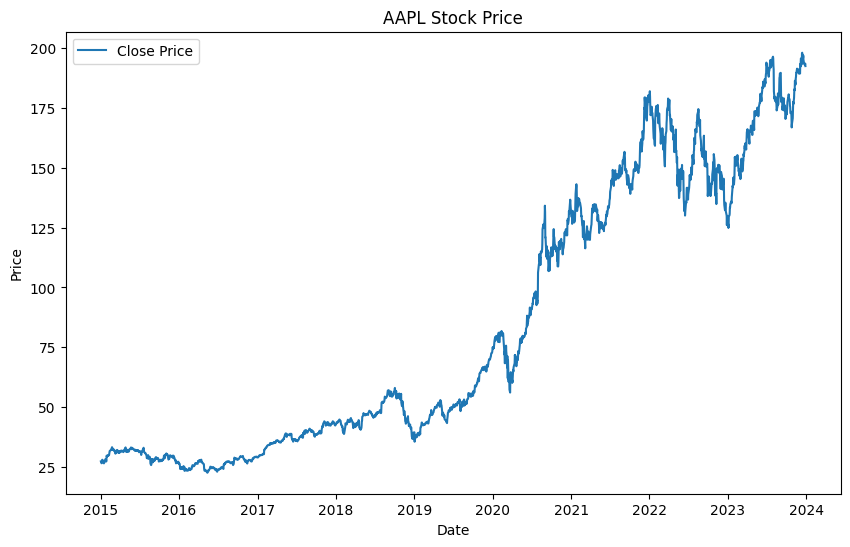

In [ ]:
# Plot closing price
plt.figure(figsize=(10, 6))
plt.plot(apple['Close'], label='Close Price')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. Compute Technical Indicators: Moving Averages

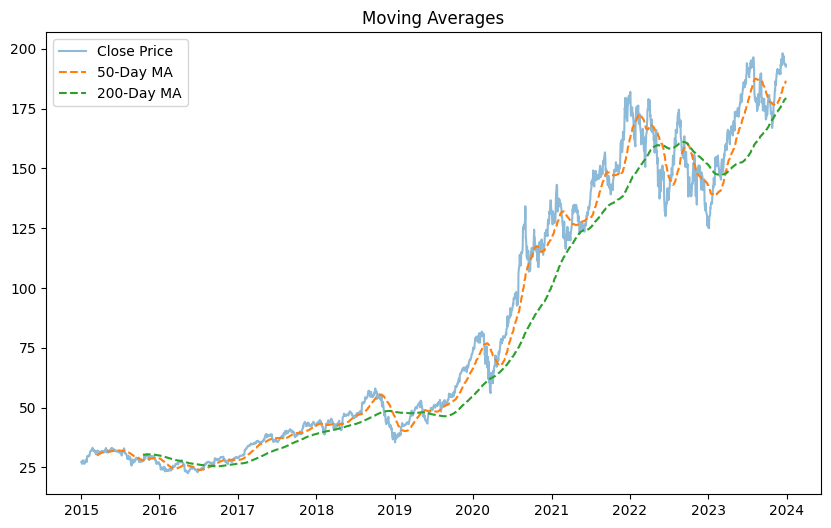

In [ ]:
# Compute 50-day and 200-day Moving Averages
apple['50-Day MA'] = apple['Close'].rolling(window=50).mean()
apple['200-Day MA'] = apple['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
plt.plot(apple['Close'], label='Close Price', alpha=0.5)
plt.plot(apple['50-Day MA'], label='50-Day MA', linestyle='--')
plt.plot(apple['200-Day MA'], label='200-Day MA', linestyle='--')
plt.title('Moving Averages')
plt.legend()
plt.show()

## 5. Perform Regression Analysis

In [ ]:
# Add Volatility as a feature
apple['Volatility'] = apple['Close'].pct_change().rolling(window=20).std()

# Prepare data for regression
X = apple[['50-Day MA', '200-Day MA', 'Volatility']].dropna()
y = apple['Close'].loc[X.index]
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.874e+04
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:32:00   Log-Likelihood:                -6827.6
No. Observations:                2065   AIC:                         1.366e+04
Df Residuals:                    2061   BIC:                         1.369e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.5103      0.385     14.314      0.000       4.755       6.265
('50-Day MA', '')      1.1206      0.017     65.372      0.000       1.087       1.154
('200-Day MA', '')    -0.1119      0.018     -6.199      0.000      -0.147      -0.076
('Volatility', '')  -297.6604     18.169    -16.383      0.000    -333.291    -262.030
==============================================================================
Omnibus:                      109.846   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.228
Skew:                           0.219   Prob(JB):                     5.32e-72
Kurtosis:                       4.903   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 6. Predictive Modeling: Random Forest

In [ ]:
# Prepare train-test split
features = apple[['50-Day MA', '200-Day MA', 'Volatility']].dropna()
target = apple['Close'].loc[features.index]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
predictions = rf_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 6.691443203351157
